# Geely Auto Car Price Prediction

## Business Understanding

**Geely Auto**, a Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. The company wants to know:
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

### Business Objective

The requirement is to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Goal of Data Analysis

The aim is to built model and perform residual analysis, and make predictions on the test set. Also, calculate the R-squared score on the test set. This can be done using Exploratory Data Analysis and Machine Learning techniques.

## Data Understanding

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import chardet
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# Import RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Import statsmodel.api

import statsmodels.api as sm  

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Find the encoding of data using chardet

data = open('./CarPrice_Assignment.csv','rb').read()
result = chardet.detect(data)
print(result['encoding'])

ascii


In [5]:
# Load the dataset

car_price = pd.read_csv('./CarPrice_Assignment.csv', encoding='ascii')

# Display the first 5 rows

car_price.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [6]:
# Display the last 5 rows

car_price.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data Cleaning

### Handling Missing Values

In [8]:
# Count of missing values in each column

car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Notice that, the dataset for car price prediction is free of missing values.<BR><BR>

### Data Quality

In [9]:
# Find the count of unique values

unique_values = {}
for col in car_price.columns:
    unique_values[col] = len(car_price[col].unique())

print(unique_values)

{'car_ID': 205, 'symboling': 6, 'CarName': 147, 'fueltype': 2, 'aspiration': 2, 'doornumber': 2, 'carbody': 5, 'drivewheel': 3, 'enginelocation': 2, 'wheelbase': 53, 'carlength': 75, 'carwidth': 44, 'carheight': 49, 'curbweight': 171, 'enginetype': 7, 'cylindernumber': 7, 'enginesize': 44, 'fuelsystem': 8, 'boreratio': 38, 'stroke': 37, 'compressionratio': 32, 'horsepower': 59, 'peakrpm': 23, 'citympg': 29, 'highwaympg': 30, 'price': 189}


Notice that, car_ID column has all unique value, which have nothing to contribute on this analysis so we can remove that column.<BR><BR>

In [10]:
# Remove columns with unique value

car_price = car_price.drop('car_ID', axis = 1)

#### Fix the invalid values

In [11]:
# View first 12 columns for data quality

car_price.iloc[0:5, 0:12]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3


In [12]:
# View next 13 columns for data quality

car_price.iloc[0:5, 12:]

,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<BR>The variable named CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. We need to consider only company name as the independent variable for model building. So we split the variable CarName and insert the `carcompany` variable with the company name of 'CarName' variable.<BR><BR>

In [13]:
# Split 'CarName' as 'carcompany'

car_price['carcompany'] = car_price.CarName.apply(lambda x: x.split()[0])

# Drop the column 'CarName'

car_price.drop('CarName', axis=1, inplace=True)

# get a list of columns

cols = list(car_price)

# move the column to head of list using index, pop and insert

cols.insert(0, cols.pop(cols.index('carcompany')))

# use loc to reorder

car_price = car_price.loc[:, cols]

In [14]:
# Unique value in 'carcompany'

car_price.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

It can be seen that there are few spelling errors in the variable 'carcompany'. The following should be corrected:
1. maxda is same as mazda
2. Nissan is same as nissan
3. porcshce is same as  porsche
4. toyouta is same as toyota
5. vokswagen is same as volkswagen
6. vw is same as volkswagen

In [15]:
# Replace the values with correct spelling

vals_to_replace = {'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota',
                   'vokswagen':'volkswagen', 'vw':'volkswagen'}
car_price['carcompany'].replace(vals_to_replace,inplace = True)

In [16]:
# Check for the unique values

car_price.carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Notice that, as per the Data Dictionary 'symboling' column is assigned insurance risk rating, with a value of +3 indicates that the auto is risky, -3 that it is probably pretty safe  and is categorical, but the values are 'int64'. So we need to convert it to categorical.

In [17]:
# Check for the unique values

car_price.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

Based on the values, -2, -1 can be considered as safe; 0, 1 can be considered as moderate; 2, 3 can be considered as risky.

In [18]:
# Replace the values with categorical values

vals_to_replace = {-2:'safe', -1:'safe', 0:'moderate', 1:'moderate', 2:'risky', 3:'risky'}
car_price['symboling'].replace(vals_to_replace,inplace = True)

In [19]:
# Check for the unique values

car_price.symboling.unique()

array(['risky', 'moderate', 'safe'], dtype=object)

In [20]:
# Round the price values to 2 decimal points

car_price['price'] = car_price['price'].round(2)

In [21]:
# Dropping Duplicates if any

car_price = car_price.drop_duplicates()

In [22]:
car_price.shape

(205, 25)

In [23]:
#Save the data after data cleaning
car_price.to_csv('./CarPrice_Assignment_data_cleaning.csv', index = False)

## Data Analysis

In [24]:
# Load the dataset

car_price = pd.read_csv('./CarPrice_Assignment_data_cleaning.csv', encoding='ascii')
car_price.head(10)

,carcompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,risky,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.00
1,alfa-romero,risky,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.00
2,alfa-romero,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.00
3,audi,risky,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.00
4,audi,risky,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.00
5,audi,risky,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.00
6,audi,moderate,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.00
7,audi,moderate,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.00
8,audi,moderate,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.00
9,audi,moderate,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.17


#### price

As price is the target variable, we will analyse the price column first.

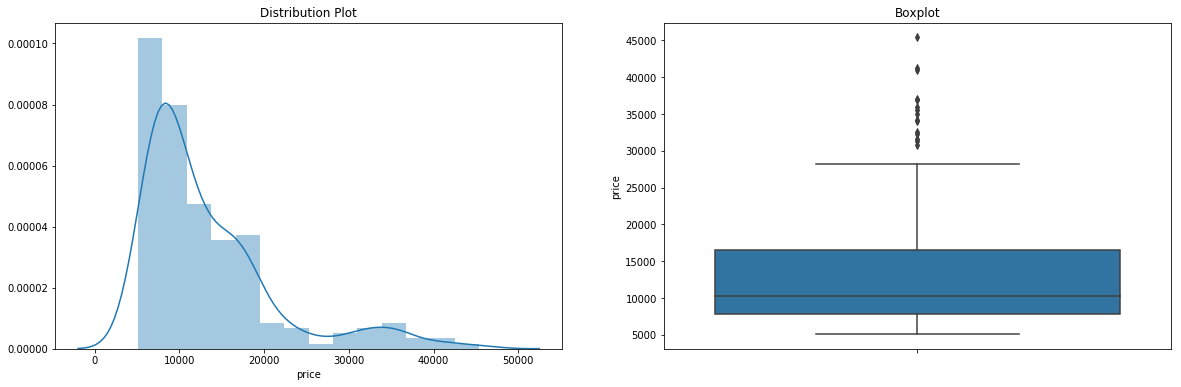

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(car_price.price)

plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(y=car_price.price)

In [26]:
car_price.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90])

count      205.000000
mean     13276.710585
std       7988.852340
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
max      45400.000000
Name: price, dtype: float64

**Insights:**<BR>
1. The plot seemed to be right-skewed. 
2. Most prices in the dataset are below the mean(13276.71). And the median value(10295.00) is less than mean of the price distribution. 
3. 85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400. 

### Univariate Analysis

#### Visualising Categorical Variables

In the Frequency Distribution Plot, the percentage of each group of a categorical variable in the dataset is plotted. And in the Box Plot, each categorical variable is plotted against the price of the car.

In [27]:
# Plot of categorical variables

def plot_categorical_variables(df,col):
    fig,axes = plt.subplots(1,2)
    fig.set_size_inches(20,6)
    axes[0].set_title("Frequency Distribution Plot")
    data = df[col].value_counts(normalize=True)*100
    ax = data.plot.bar(rot=0, color=sns.color_palette('husl', 16), ax = axes[0])
    ax.set_xlabel(col)
    ax.set_ylabel('% in Dataset')
       
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
        
    axes[1].set_title("Box Plot")
    sns.boxplot(x = df[col], y = df['price'], ax = axes[1])

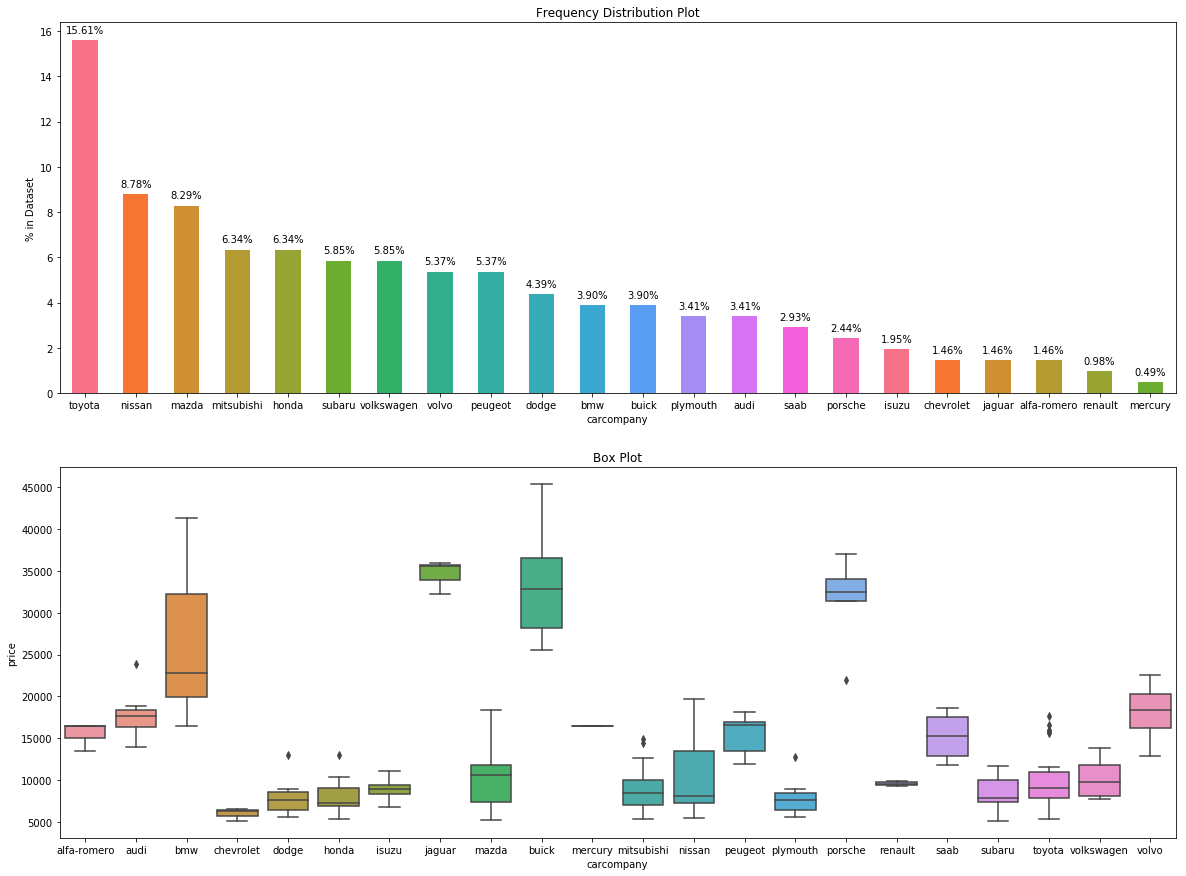

In [28]:
fig,axes = plt.subplots(2,1)
fig.set_size_inches(20,15)
axes[0].set_title("Frequency Distribution Plot")
data = car_price['carcompany'].value_counts(normalize=True)*100
ax = data.plot.bar(rot=0, color=sns.color_palette('husl', 16), ax = axes[0])
ax.set_xlabel('carcompany')
ax.set_ylabel('% in Dataset')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
axes[1].set_title("Box Plot")
sns.boxplot(x = car_price['carcompany'], y = car_price['price'], ax = axes[1])

**Insights:**<BR>
1. `Toyota` seems to be dominant in US market with 15.61%. Followed by `Nissan`(8.78%) and `Mazda`(8.29%)
2. `Jaguar`, `Buick` and `Porsche` seems to have the most expensive. Followed by `volvo` and `bmw`.
3. `Chevrolet` has the lowest price in the US market.
4. `Toyota`, being the top in the market has price between 5000 and 12500 USD.
5. There is only one data for `Mercury`.

In [29]:
# Find the categorical variables

categorical = car_price.select_dtypes(include=object).columns.tolist()

In [30]:
# Remove 'carcompany' from categorical variable

categorical.remove('carcompany')

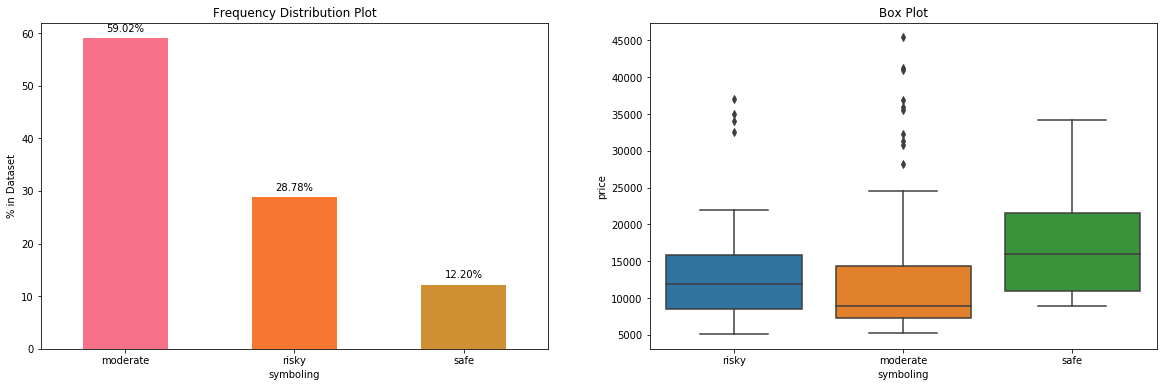

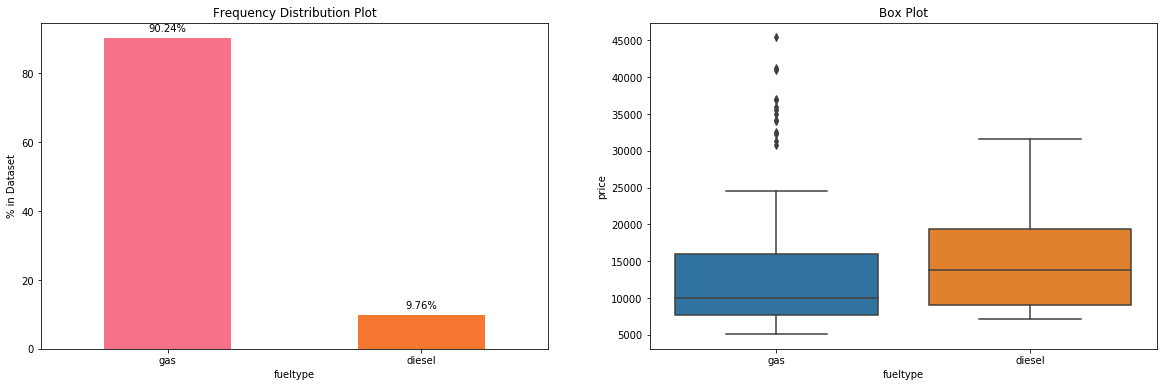

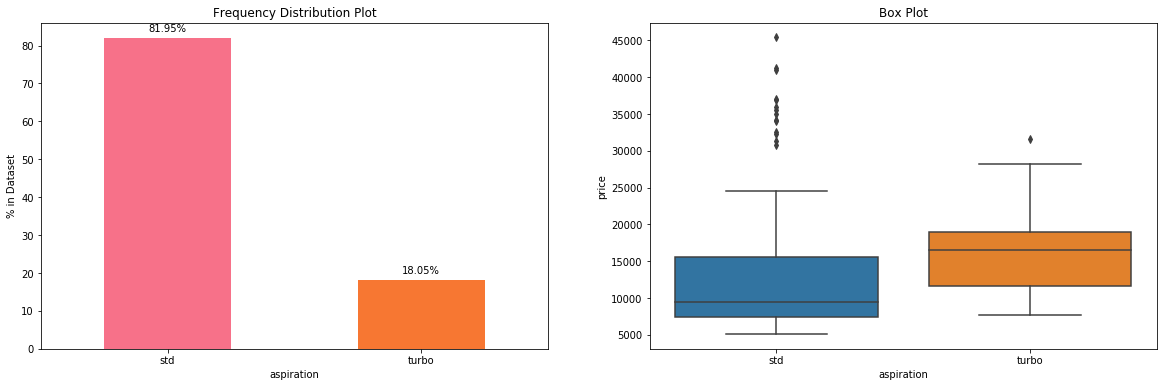

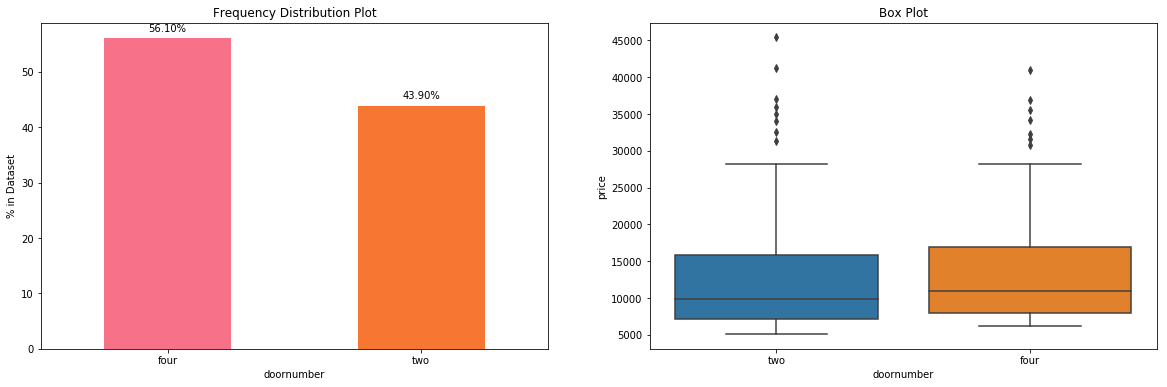

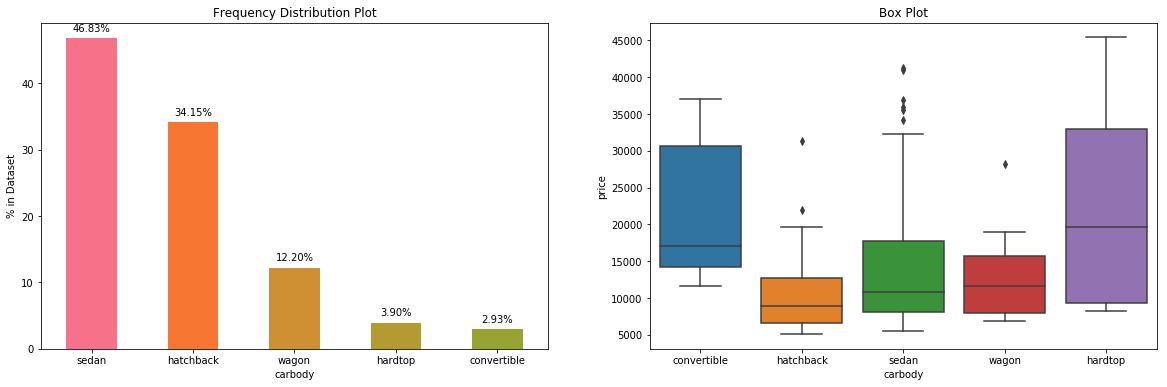

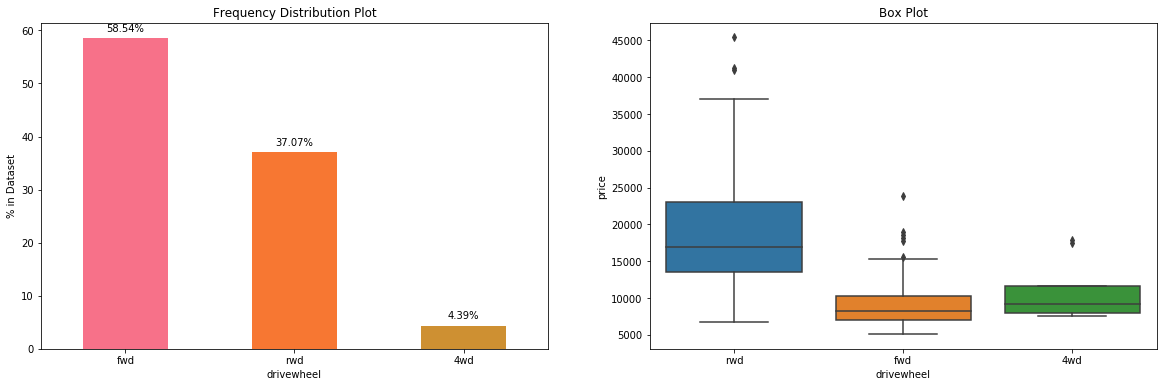

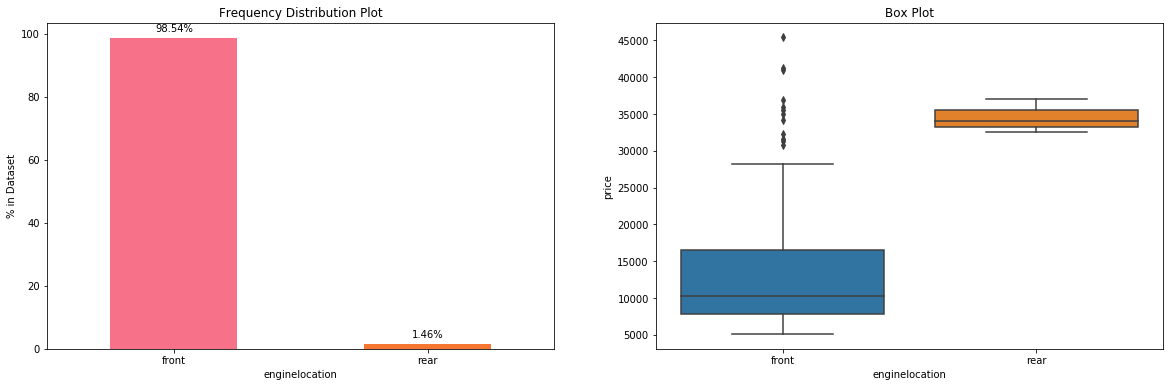

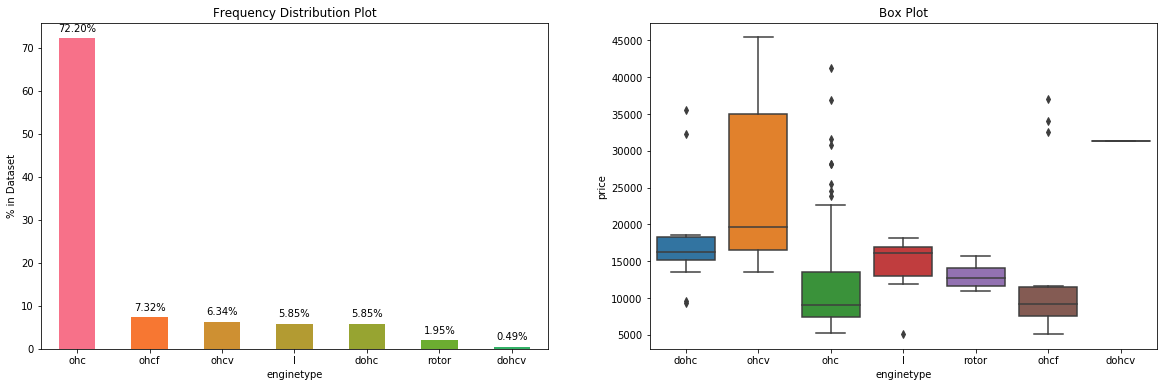

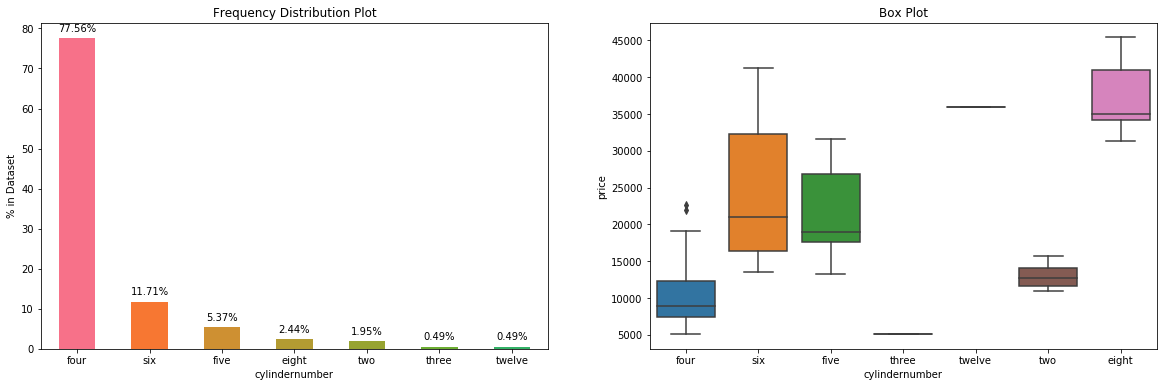

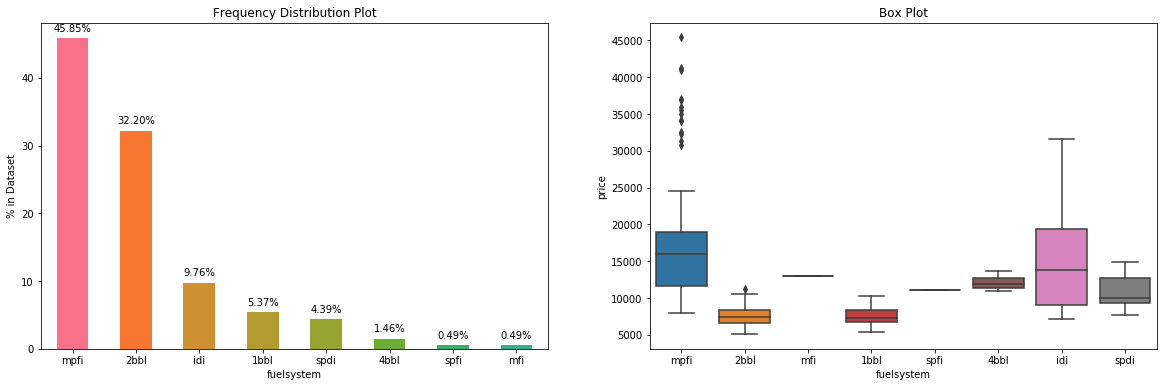

In [31]:
# Plot the categorical variables

for col in categorical:
    plot_categorical_variables(car_price,col)

**Insights:**<BR>
1. `Moderate` risk insurance rates are the most sold, but they are of low price. The highest price are for `safe` insurance rates.
2. Most sold ones are with `gas` fuel type, and they are with low price. `Diesel` has higher price than `gas`.
3. `std` are the most sold aspiration and has low price when compared to `turbo`.
4. Though `four` is sold the most in `doornumber` variable,it is not affecting the price much. There is no sugnificant difference between the two categories.
5. `sedan` is the preferred `carbody` type in US market.`convertible` and `hardtop` are the most expensive.
6. `fwd`, front wheel drive, is the most sold and `4wd`, four wheel drive, is the least sold. Whereas, `rwd`, rear wheel drive is the most expensive.
7. The `front` type in `enginelocation` variable is the most sold. The `rear` type data points are very less to make an inference.
8. `ohc` engine type is the most preferred one and is of lower price. `ohcv` has the highest price range and `ohc` and `ohcf` have the low price range. `dohcv` have only one value for analysis.
9. The one with `four` cylinder number is the most preferred. `eight` has the highest price. `three` and `twelve` have only one data point.
10. `mpfi` fuel system is sold the most. Followed by `2bbl` and `idi`. `mpfi` and `idi` has the highest price range. `spfi` and `mfi` have only few data to derive any meaningful inference.

#### Visualising Numeric Variables

In the Distribution Plot, the distribution of each numerical variable is plotted. And in the Scatter Plot, each numerical variable is plotted against the price of the car.

In [32]:
# Plot of numerical variables

def plot_numerical_variables(df,col):
    fig,axes = plt.subplots(1,2)
    fig.set_size_inches(18,4)
    axes[0].set_title("Distribution Plot")
    sns.distplot(df[col], ax=axes[0])

    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
        
    axes[1].set_title("Scatter Plot")
    sns.scatterplot(x = df[col], y = df['price'], ax = axes[1])

In [33]:
# Find the numerical variables

numerical = car_price.select_dtypes(exclude=object).columns.tolist()

In [34]:
# Remove 'price' from numerical variable

numerical.remove('price')

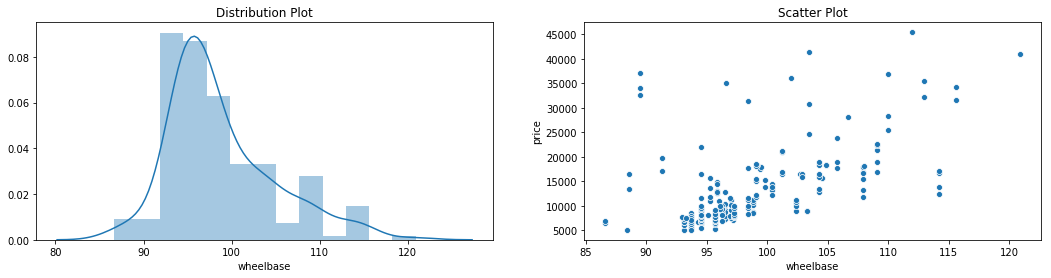

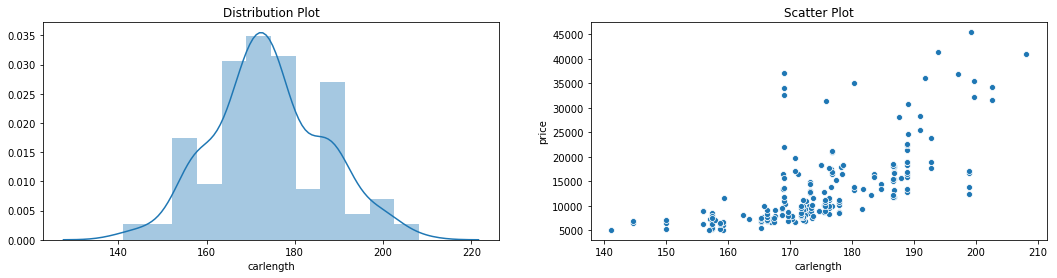

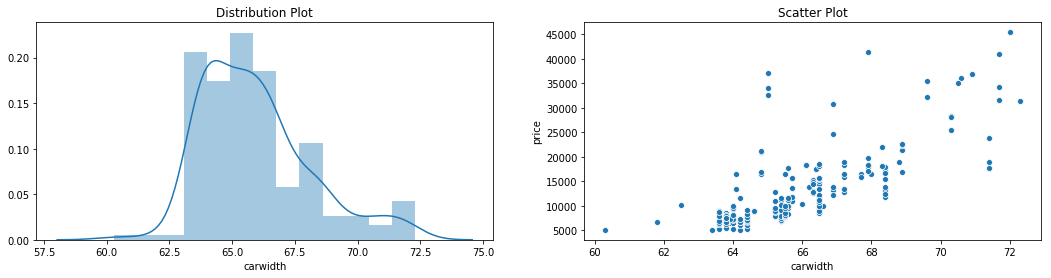

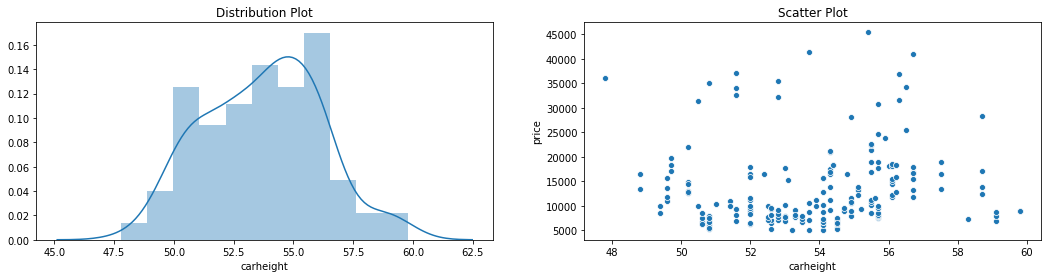

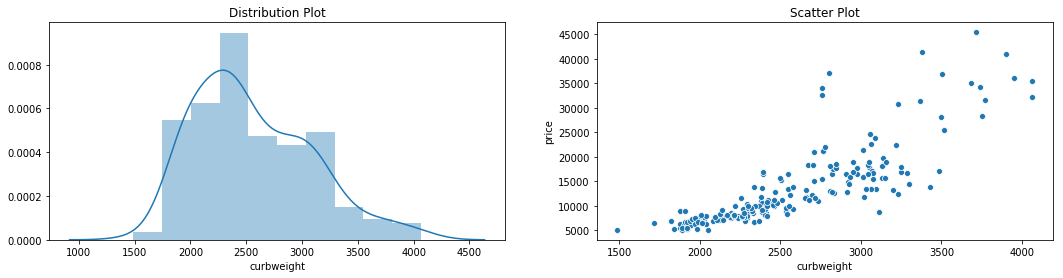

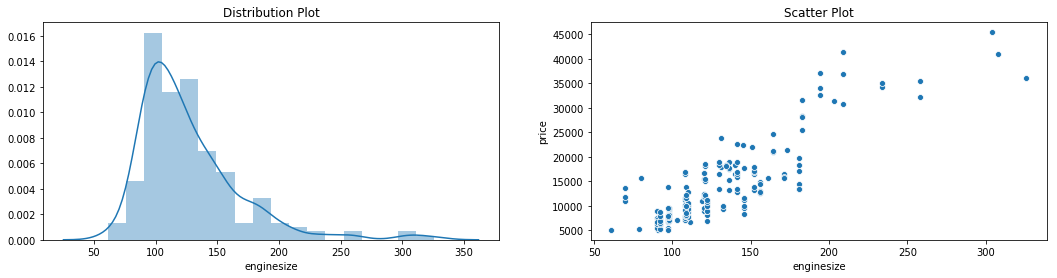

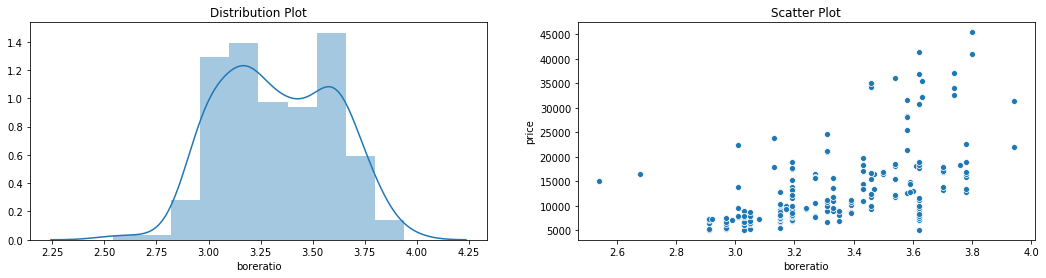

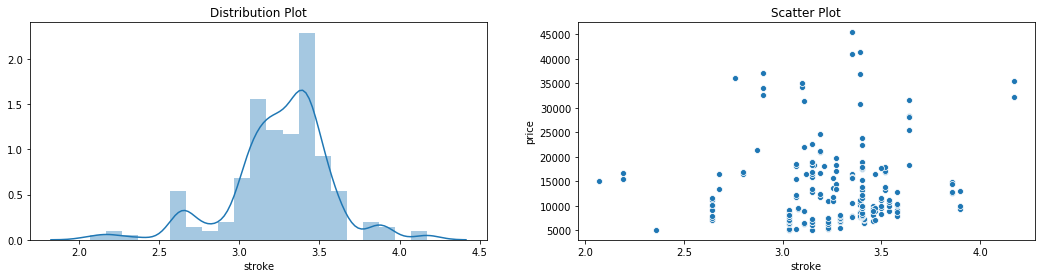

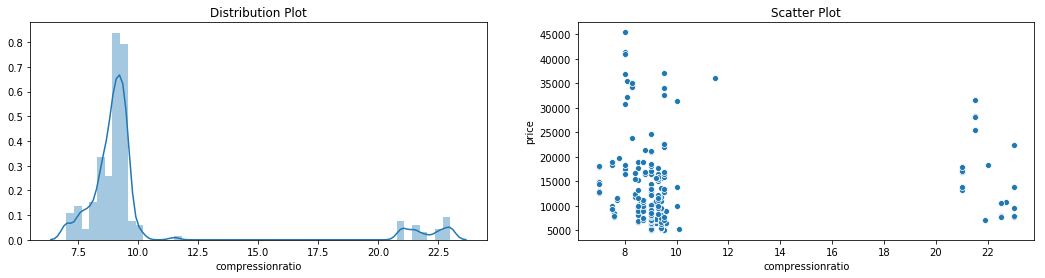

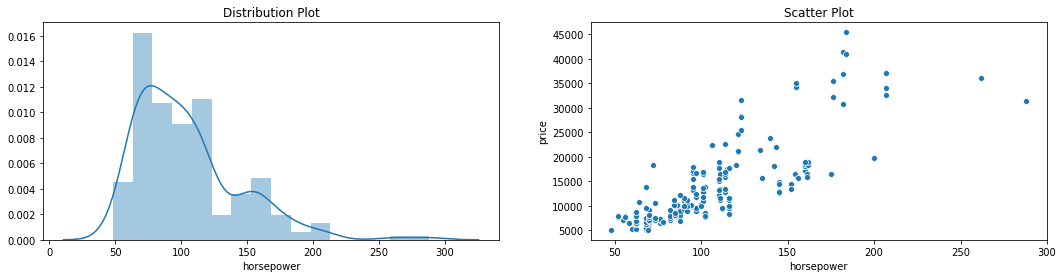

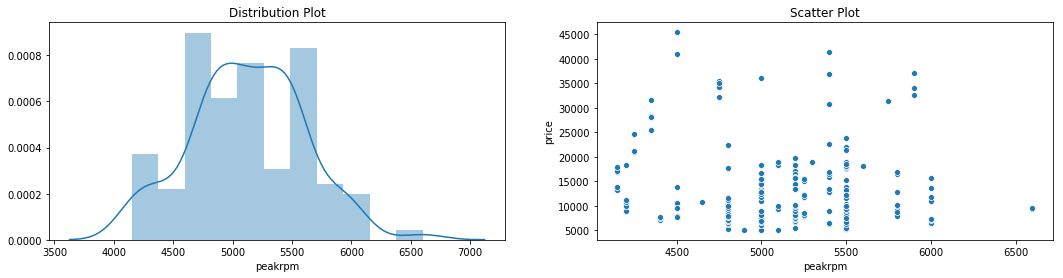

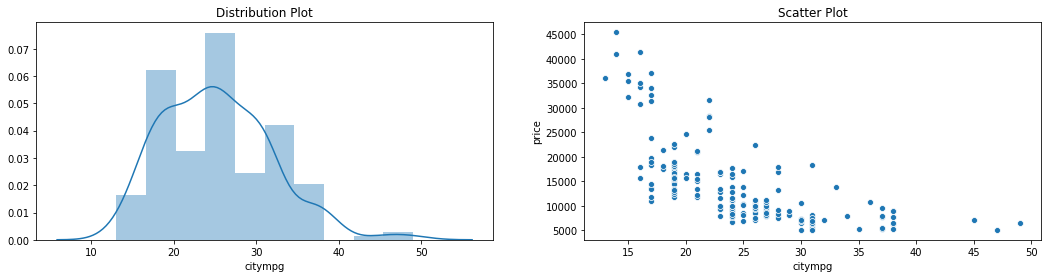

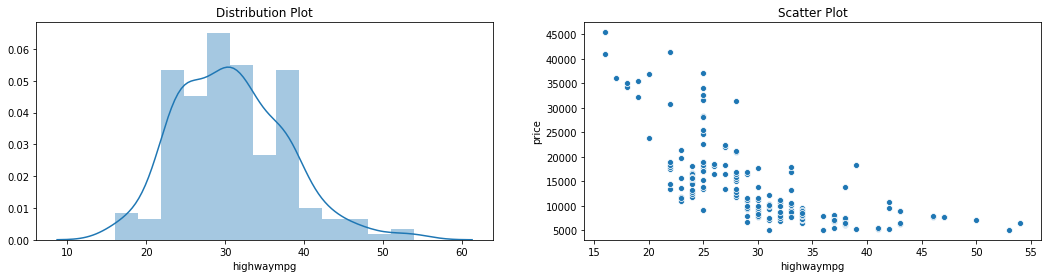

In [35]:
# Plot the numerical variables

for col in numerical:
    plot_numerical_variables(car_price,col)

**Insights:**<BR>
1. Variables `wheelbase`, `carlength`, `carwidth`, `carheight`, `boreratio`, `stroke`, `peakrpm`, `citympg`, `highwaympg` have a normal distribution without any skewness.     
2. Variables `wheelbase`, `carlength`, `carwidth`, `curbweight`, `enginesize`, `boreratio`, `horsepower` have positive relationship with `price`.
3. `citympg`, `highwaympg` seem to have a negative relationship with `price`.
4. `carheight`, `stroke`, `compressionratio`, `peakrpm` doesn't show any significant relationship with `price`.
5. `curbweight`, `enginesize`, `compressionratio`, `horsepower` has right-skewed distribution.

### Derived Metrics

#### combinedfueleconomy
Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.

In [36]:
# Derive combinedfueleconomy

car_price['combinedfueleconomy'] = (0.55 * car_price['citympg']) + (0.45 * car_price['highwaympg'])

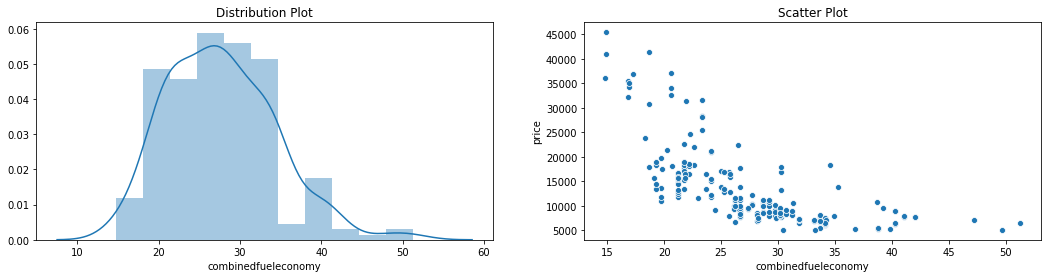

In [37]:
# Plot combinedfueleconomy

plot_numerical_variables(car_price,'combinedfueleconomy')

**Insights:**<BR>
1. `combinedfueleconomy` has a normal distribution without any skewness.     
2. `combinedfueleconomy` seem to have a negative relationship with `price`.

#### carparkarea
Car Park Area is calculated by multiplying car length and car width.

In [38]:
# Derive carparkarea

car_price['carparkarea'] = car_price['carlength'] * car_price['carwidth']

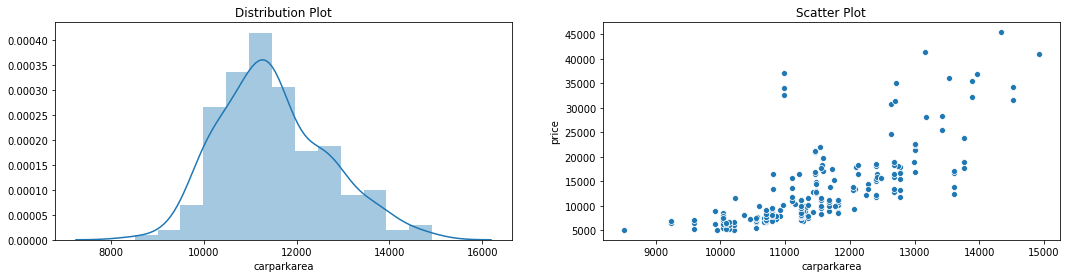

In [39]:
# Plot carparkarea

plot_numerical_variables(car_price,'carparkarea')

**Insights:**<BR>
1. `carparkarea` has a normal distribution without any skewness.     
2. `carparkarea` seem to have a positive relationship with `price`.

#### carlengthtocarwidth
Variable `carlengthtocarwidth` is Car Width to Car Length ratio

In [40]:
# Derive carlengthtocarwidth

car_price['carlengthtocarwidth'] = car_price['carlength'] / car_price['carwidth']

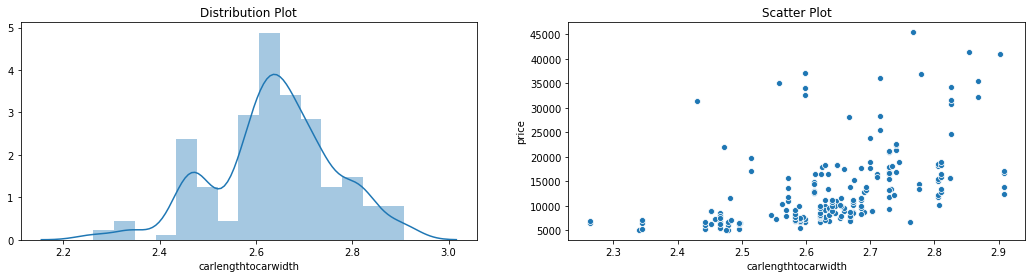

In [41]:
# Plot carlengthtocarwidth

plot_numerical_variables(car_price, 'carlengthtocarwidth')

**Insights:**<BR>
1. `carlengthtocarwidth` has a normal distribution without any skewness.     
2. `carlengthtocarwidth` seem to have a positive relationship with `price`.

#### carwidthtocarheight
Variable `carwidthtocarheight` is Car Width to Car Height ratio

In [42]:
# Derive carwidthtocarheight

car_price['carwidthtocarheight'] = car_price['carwidth'] / car_price['carheight']

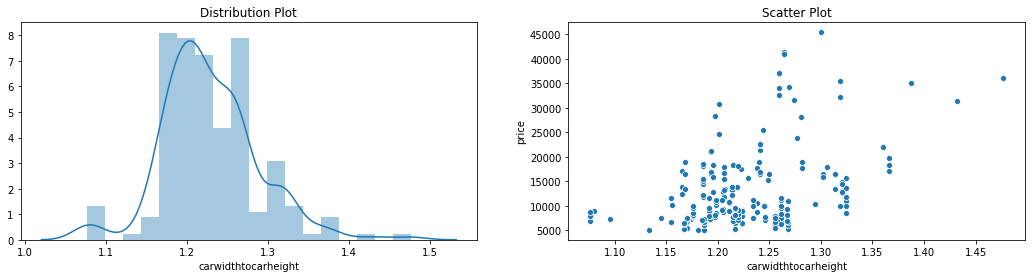

In [43]:
# Plot carwidthtocarheight

plot_numerical_variables(car_price, 'carwidthtocarheight')

**Insights:**<BR>
1. `carwidthtocarheight` has a normal distribution without any skewness.     
2. `carwidthtocarheight` seem to have a positive relationship with `price`.

#### carlengthtocarheight
Variable `carlengthtocarheight` is Car Length to Car Height ratio

In [44]:
# Derive carwidthtocarheight

car_price['carlengthtocarheight'] = car_price['carlength'] / car_price['carheight']

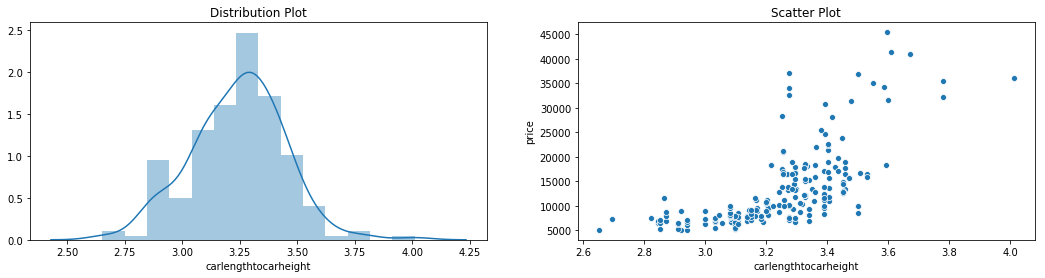

In [45]:
# Plot carwidthtocarheight

plot_numerical_variables(car_price, 'carlengthtocarheight')

**Insights:**<BR>
1. `carlengthtocarheight` has a normal distribution without any skewness.     
2. `carlengthtocarheight` seem to have a positive relationship with `price`.

#### powertoweightratio

Variable `powertoweightratio` is ratio of `horsepower` to `curbweight`

In [46]:
# Derive powertoweightratio

car_price['powertoweightratio'] = car_price['horsepower'] / car_price['curbweight']

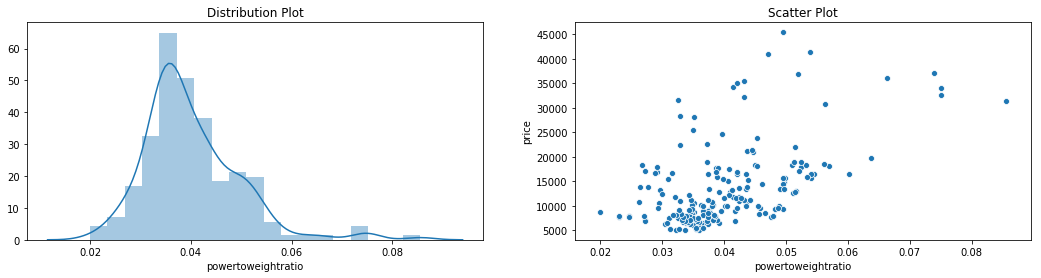

In [47]:
# Plot powertoweightratio

plot_numerical_variables(car_price, 'powertoweightratio')

**Insights:**<BR>
1. `powertoweightratio` has a normal distribution without any skewness.     
2. `powertoweightratio` seem to have a positive relationship with `price`. Expensive cars has high `powertoweightratio`.

#### companyclass
Variable `companyclass` classifies `carcompany` based on average price of cars into 'economycars', 'mediumcars' and 'luxurycars'.
-  **economycars**: Average price is less than 10,000 USD
-  **mediumcars**: Average price is between 10,000 and 20,000 USD
-  **luxurycars**: Average price is more than 20,000 USD

In [48]:
# Derive companyclass


binning = pd.DataFrame(car_price.groupby('carcompany').price.mean().sort_values(ascending=False))
binning['companyclass'] = binning['price'].map(lambda x: 'economycars' if (x < 10000) else 'mediumcars' if (x >= 10000 and x <= 20000) 
                                else 'luxurycars')
binning.drop('price',axis=1,inplace=True)
car_price = car_price.merge(binning, how = 'left', on = 'carcompany')

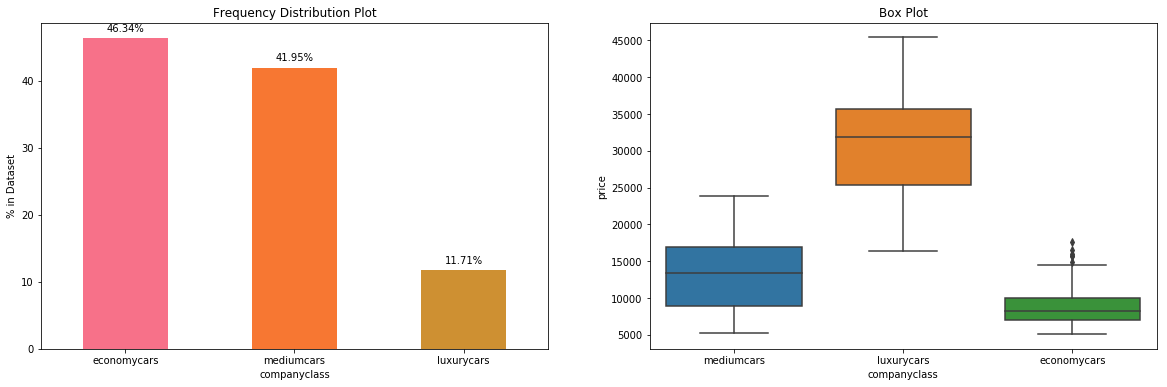

In [49]:
plot_categorical_variables(car_price, 'companyclass')

**Insights:**<BR>
1. `economycars` are the most sold, followed by `mediumcars`. `luxurycars` are the most expensive, whereas `economycars` are the cheap ones.

### Bivariate Analysis

#### price over companyclass and fueltype

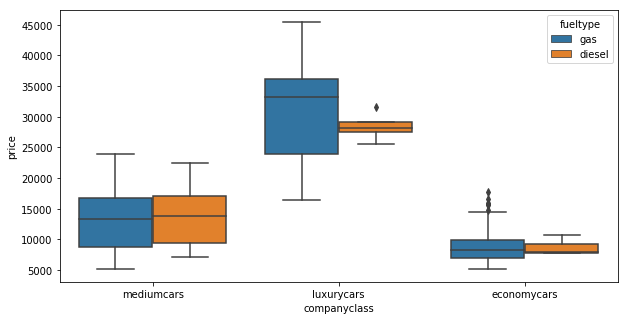

In [50]:
# price over fueltype and combinedfueleconomy

plt.figure(figsize=(10,5))
sns.boxplot(x='companyclass', y = 'price', hue = 'fueltype', data = car_price)

**Insights:**<BR>
   1. Among the medium cars, fuel type doesn't have significant difference. But gas fuel type is most common among luxury cars.

#### price over fueltype and enginetype

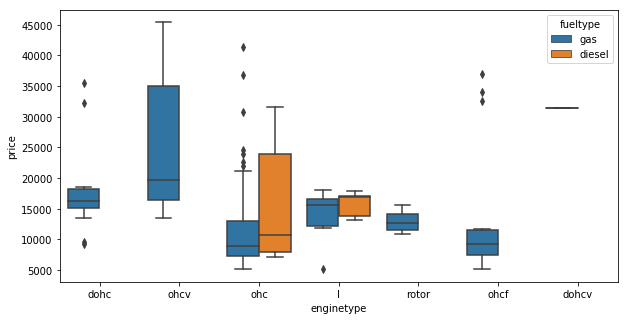

In [51]:
# price over fueltype and enginetype plot

plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y = 'price', hue = 'fueltype', data = car_price)

**Insights:**
1. Only l and ohc engine type has diesel fuel, rest have gas as fuel.

#### price over enginetype and cylindernumber

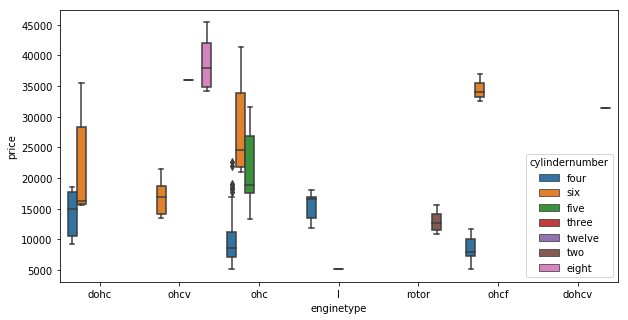

In [52]:
# price over enginetype and cylindernumber

plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y = 'price', hue = 'cylindernumber', data = car_price)

**Insights:**
1. Cylinder numbers four and six are common among different engine types. Cylinder number eight with ohcv engine type is the expensive one.

#### price over carbody and drivewheel

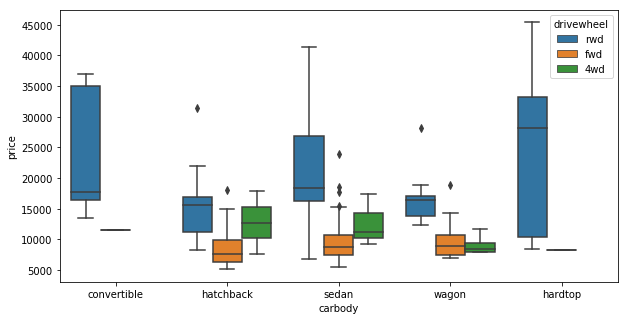

In [53]:
# price over carbody and drivewheel

plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y = 'price', hue = 'drivewheel', data = car_price)

**Insights:**
1. Rear wheel drive is the common drive wheel. Hardtop rear wheel drive is the most expensive. Hatchback, Sedan and Wagon has all three types of wheel drives.

#### companyclass over powertoweightratio and combinedfueleconomy

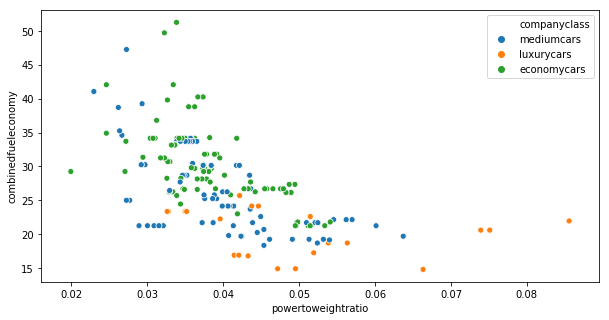

In [54]:
# companyclass over powertoweightratio and combinedfueleconomy

plt.figure(figsize=(10,5))
sns.scatterplot(x='powertoweightratio', y = 'combinedfueleconomy', hue = 'companyclass', data = car_price)

**Insights:**
1. Luxury cars have low combined fuel economy(mileage) and high power to weight ratio. Medium and Economy cars have more mileage but less power to weight ratio.

#### companyclass over boreratio and enginesize

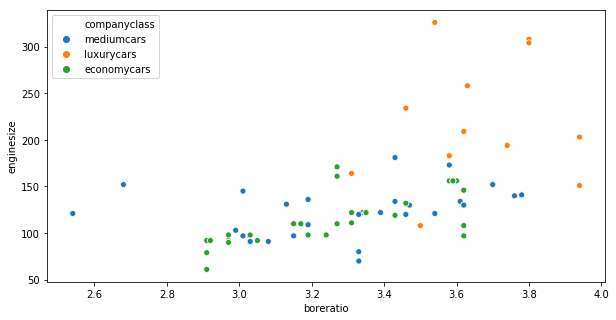

In [55]:
# companyclass over powertoweightratio and combinedfueleconomy

plt.figure(figsize=(10,5))
sns.scatterplot(x='boreratio', y = 'enginesize', hue = 'companyclass', data = car_price)

**Insights:**
1. Luxury cars have high bore value and high engine size. Medium and economy cars have engine size less than 200.

#### Correlation Matrix

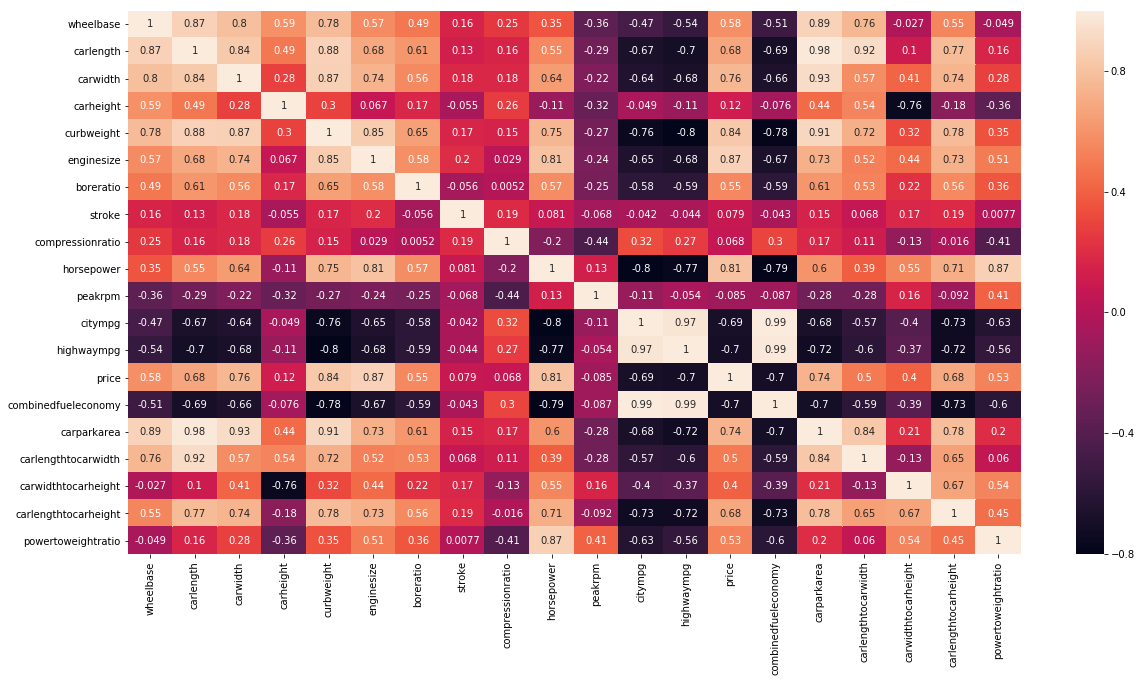

In [56]:
# Plot the correlation of numerical variables

plt.figure(figsize = (20,10)) 
sns.heatmap(car_price.corr(), annot=True)

It can be seen that there is multicollinearity between predictor variables, we may choose to drop anyone of these. Following are some of the variables:

- carlength with wheelbase, carwidth, curbweight
- curbweight with enginesize, carlength, carwidth, wheelbase
- enginesize with horsepower, curbweight and  car dimensions
- highway and city mpg's are highly correlated with a correlation cofficient of 0.97. 

As `carlength` and `carwidth` and `citympg` and `highwaympg` are highly correlated and we have derived metrics based on the same, we can remove these variables.

In [57]:
# Drop the variables carlength, carwidth, citympg, highwaympg

car_price.drop(['carlength', 'carwidth', 'citympg', 'highwaympg'], axis = 1, inplace = True)

We have classified the `carcompany` variable to `companyclass` based on average price of car. So, we can drop the `carcompany` class

In [58]:
# Drop the variables carlength, carwidth, citympg, highwaympg

car_price.drop(['carcompany'], axis = 1, inplace = True)

### Remove Outliers

Linear Regression model is sensitive to outliers. If the number of outliers relative to non-outlier data points, then the linear regression model will be skewed away from the true relationship between dependent and independent variables.<BR>
Earlier, we found that the target variable, `price` has outliers. For the analysis purpose, as the number of data points are less, we did not remove those outliers then.

#### price

As it is found that price (Price of car) column have outliers. Therefore we need to remove the outliers. Our approach is to remove the outlier points by eliminating any points that were above (Mean + 3 ∗ SD) and any points below (Mean - 3 ∗ SD).

In [59]:
# Remove the outliers in price

low = car_price['price'].mean() - car_price['price'].std()
high = car_price['price'].mean() + car_price['price'].std()
car_price = car_price.loc[(car_price['price'] > low) & (car_price['price'] < high)]

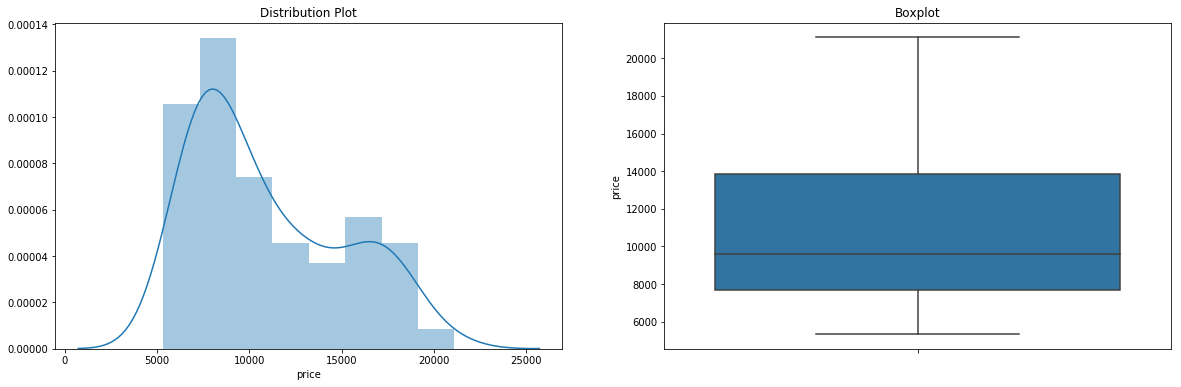

In [60]:
# Plot the price column after removing outliers 

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(car_price.price)

plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(y=car_price.price)

Plot curbweight, enginesize, compressionratio, horsepower as it was right-skewed distribution in the data analysis.

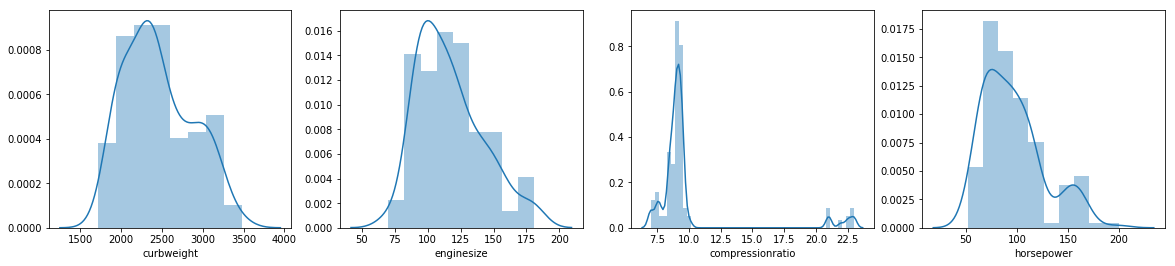

In [61]:
# Plot curbweight, enginesize, compressionratio, horsepower

plt.figure(figsize=(20, 4))
plt.subplot(1,4,1)
sns.distplot(car_price['curbweight'])
plt.subplot(1,4,2)
sns.distplot(car_price['enginesize'])
plt.subplot(1,4,3)
sns.distplot(car_price['compressionratio'])
plt.subplot(1,4,4)
sns.distplot(car_price['horsepower'])

It can be seen that that only compression ratio has right-skewed distiribution and the values are less in number. As the number of data points are less, we will replace the outliers with median value.

In [62]:
# Find the percentiles

car_price['compressionratio'].describe(percentiles = [0.25,0.5,0.75,0.9,0.915])

count    178.000000
mean       9.970899
std        3.743517
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
90%        9.720000
91.5%     10.095500
max       23.000000
Name: compressionratio, dtype: float64

In [63]:
# Replace outliers with median value

car_price['compressionratio'][np.abs(car_price['compressionratio'] > 10.1)]= 9

In [64]:
car_price.shape

(178, 27)

In [65]:
#Save the data after data cleaning
car_price.to_csv('./CarPrice_Assignment_data_analysis.csv', index = False)

## Modelling

In [66]:
# Load the dataset

car_price = pd.read_csv('./CarPrice_Assignment_data_analysis.csv', encoding='ascii')
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,...,horsepower,peakrpm,price,combinedfueleconomy,carparkarea,carlengthtocarwidth,carwidthtocarheight,carlengthtocarheight,powertoweightratio,companyclass
0,risky,gas,std,two,convertible,rwd,front,88.6,48.8,2548,...,111,5000,13495.00,23.70,10820.08,2.633385,1.313525,3.459016,0.043564,mediumcars
1,risky,gas,std,two,convertible,rwd,front,88.6,48.8,2548,...,111,5000,16500.00,23.70,10820.08,2.633385,1.313525,3.459016,0.043564,mediumcars
2,moderate,gas,std,two,hatchback,rwd,front,94.5,52.4,2823,...,154,5000,16500.00,22.15,11213.60,2.613740,1.250000,3.267176,0.054552,mediumcars
3,risky,gas,std,four,sedan,fwd,front,99.8,54.3,2337,...,102,5500,13950.00,26.70,11690.92,2.667674,1.219153,3.252302,0.043646,mediumcars
4,risky,gas,std,four,sedan,4wd,front,99.4,54.3,2824,...,115,5500,17450.00,19.80,11726.24,2.659639,1.222836,3.252302,0.040722,mediumcars
5,risky,gas,std,two,sedan,fwd,front,99.8,53.1,2507,...,110,5500,15250.00,21.70,11754.99,2.674208,1.248588,3.338983,0.043877,mediumcars
6,moderate,gas,std,four,sedan,fwd,front,105.8,55.7,2844,...,110,5500,17710.00,21.70,13758.78,2.698880,1.281867,3.459605,0.038678,mediumcars
7,moderate,gas,std,four,wagon,fwd,front,105.8,55.7,2954,...,110,5500,18920.00,21.70,13758.78,2.698880,1.281867,3.459605,0.037238,mediumcars
8,moderate,gas,turbo,two,hatchback,4wd,front,99.5,52.0,3053,...,160,5500,17859.17,18.70,12099.78,2.624448,1.305769,3.426923,0.052407,mediumcars
9,risky,gas,std,two,sedan,rwd,front,101.2,54.3,2395,...,101,5800,16430.00,25.70,11456.64,2.728395,1.193370,3.255985,0.042171,luxurycars


### Binary Mapping

It can see that the dataset has columns with two values. In order to fit a regression line, we need numerical values. Hence, we need to convert them to 1's and 0's.

In [67]:
# Convert the string values in 'fueltype', 'aspiration', 'doornumber' columns to 1's and 0's

car_price['fueltype'] = car_price['fueltype'].map({'gas': 1, 'diesel': 0})
car_price['aspiration'] = car_price['aspiration'].map({'std': 1, 'turbo': 0})
car_price['doornumber'] = car_price['doornumber'].map({'two': 1, 'four': 0})
car_price['enginelocation'] = car_price['enginelocation'].map({'front': 1, 'rear': 0})
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,...,horsepower,peakrpm,price,combinedfueleconomy,carparkarea,carlengthtocarwidth,carwidthtocarheight,carlengthtocarheight,powertoweightratio,companyclass
0,risky,1,1,1,convertible,rwd,1,88.6,48.8,2548,...,111,5000,13495.0,23.70,10820.08,2.633385,1.313525,3.459016,0.043564,mediumcars
1,risky,1,1,1,convertible,rwd,1,88.6,48.8,2548,...,111,5000,16500.0,23.70,10820.08,2.633385,1.313525,3.459016,0.043564,mediumcars
2,moderate,1,1,1,hatchback,rwd,1,94.5,52.4,2823,...,154,5000,16500.0,22.15,11213.60,2.613740,1.250000,3.267176,0.054552,mediumcars
3,risky,1,1,0,sedan,fwd,1,99.8,54.3,2337,...,102,5500,13950.0,26.70,11690.92,2.667674,1.219153,3.252302,0.043646,mediumcars
4,risky,1,1,0,sedan,4wd,1,99.4,54.3,2824,...,115,5500,17450.0,19.80,11726.24,2.659639,1.222836,3.252302,0.040722,mediumcars


### Dummy Variables

Generate dummy values for categorical columns with more than 2 levels

In [68]:
# Define a dummy variables creation function

def dummy_variables_creation(col,df):
    status = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, status], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return df

In [69]:
# Find the categorical variables for dummy values

categorical_for_dummy = car_price.select_dtypes(include = object)

# Create dummy variables for each column

for col in categorical_for_dummy:
    car_price = dummy_variables_creation(col, car_price)

In [70]:
car_price.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,luxurycars,mediumcars
0,1,1,1,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,0,1


In [71]:
car_price.shape

(178, 45)

### Splitting the Data into Training and Testing Sets

In [72]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
# Find the count of unique values

unique_values = {}
for col in df_train.columns:
    unique_values[col] = len(df_train[col].unique())

print(unique_values)

{'fueltype': 2, 'aspiration': 2, 'doornumber': 2, 'enginelocation': 1, 'wheelbase': 39, 'carheight': 41, 'curbweight': 105, 'enginesize': 29, 'boreratio': 30, 'stroke': 29, 'compressionratio': 20, 'horsepower': 44, 'peakrpm': 16, 'price': 117, 'combinedfueleconomy': 48, 'carparkarea': 59, 'carlengthtocarwidth': 59, 'carwidthtocarheight': 61, 'carlengthtocarheight': 64, 'powertoweightratio': 114, 'risky': 2, 'safe': 2, 'hardtop': 2, 'hatchback': 2, 'sedan': 2, 'wagon': 2, 'fwd': 2, 'rwd': 2, 'l': 2, 'ohc': 2, 'ohcf': 2, 'ohcv': 2, 'rotor': 2, 'four': 2, 'six': 2, 'two': 2, '2bbl': 2, '4bbl': 2, 'idi': 2, 'mfi': 2, 'mpfi': 2, 'spdi': 2, 'spfi': 1, 'luxurycars': 2, 'mediumcars': 2}


In [75]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = [key for key, value in unique_values.items() if value > 2]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,luxurycars,mediumcars
131,1,1,0,1,0.329710,0.936364,0.882502,0.198198,0.336364,0.491228,...,0,1,0,0,0,0,0,0,0,0
140,1,1,1,1,0.286232,0.345455,0.310171,0.252252,0.463636,0.491228,...,0,1,0,0,0,0,0,0,0,0
12,1,1,0,1,0.528986,0.500000,0.664561,0.846847,0.572727,0.584795,...,0,0,0,0,0,1,0,0,1,0
16,1,1,1,1,0.257246,0.181818,0.102969,0.180180,0.263636,0.608187,...,0,1,0,0,0,0,0,0,0,0
116,1,1,1,1,0.242754,0.627273,0.332912,0.342342,0.854545,0.263158,...,0,1,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [77]:
y_train = df_train.pop('price')
X_train = df_train

## Building the model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE.

### RFE
Recursive feature elimination

In [78]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 19),
 ('aspiration', False, 8),
 ('doornumber', False, 14),
 ('enginelocation', False, 24),
 ('wheelbase', True, 1),
 ('carheight', False, 22),
 ('curbweight', True, 1),
 ('enginesize', False, 21),
 ('boreratio', True, 1),
 ('stroke', False, 9),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('combinedfueleconomy', False, 2),
 ('carparkarea', True, 1),
 ('carlengthtocarwidth', True, 1),
 ('carwidthtocarheight', True, 1),
 ('carlengthtocarheight', True, 1),
 ('powertoweightratio', True, 1),
 ('risky', False, 20),
 ('safe', False, 15),
 ('hardtop', True, 1),
 ('hatchback', False, 11),
 ('sedan', False, 13),
 ('wagon', False, 12),
 ('fwd', False, 18),
 ('rwd', False, 7),
 ('l', True, 1),
 ('ohc', False, 23),
 ('ohcf', False, 16),
 ('ohcv', False, 10),
 ('rotor', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('two', True, 1),
 ('2bbl', True, 1),
 ('4bbl', False, 4),
 ('idi', False, 17),
 ('mfi', False, 3),
 ('mpfi', False, 6),
 ('

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'boreratio', 'compressionratio',
       'horsepower', 'peakrpm', 'carparkarea', 'carlengthtocarwidth',
       'carwidthtocarheight', 'carlengthtocarheight', 'powertoweightratio',
       'hardtop', 'l', 'rotor', 'four', 'six', 'two', '2bbl', 'luxurycars',
       'mediumcars'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carheight',
       'enginesize', 'stroke', 'combinedfueleconomy', 'risky', 'safe',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [82]:
# Create X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

Define a function to build Multiple Linear Regression model

In [83]:
def mlr_model(X,y):
    
    # Add a constant variable 
    X = sm.add_constant(X)
    
    # Run the linear model   
    lm = sm.OLS(y,X).fit() 
    
    # Summary of our linear model
    print(lm.summary())
    
    return X

Define a function to calculate Variance Inflation Factor(VIF)

In [84]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

Build a model with all features found after RFE.

In [85]:
# Build the linear model

mlrm_1 =  mlr_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     56.31
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.71e-46
Time:                        19:28:40   Log-Likelihood:                 143.77
No. Observations:                 124   AIC:                            -247.5
Df Residuals:                     104   BIC:                            -191.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1188 

In [86]:
# Calculate the VIF values

calculate_vif(X_train_rfe)

,Features,VIF
16,two,inf
13,rotor,inf
9,carlengthtocarheight,946.79
7,carlengthtocarwidth,721.63
10,powertoweightratio,594.92
4,horsepower,557.41
8,carwidthtocarheight,493.04
1,curbweight,219.48
6,carparkarea,121.88
14,four,45.59


It can be seen that R-squared value is 91.1% and Adjusted R-squared value is 89.5%.

`carlengthtocarwidth` has a p-value 0.832, greater than 0.05, therefore it is insignificant in presence of other variables, so it can be dropped.

In [87]:
# Drop the feature carlengthtocarwidth

X_train_new = X_train_rfe.drop(["carlengthtocarwidth"], axis = 1)

#### Model 2

Rebuilding the model without `carlengthtocarwidth`

In [88]:
# Build the linear model

mlrm_2 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     59.99
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.41e-47
Time:                        19:28:40   Log-Likelihood:                 143.74
No. Observations:                 124   AIC:                            -249.5
Df Residuals:                     105   BIC:                            -195.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0132 

In [89]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
15,two,inf
12,rotor,inf
9,powertoweightratio,256.31
4,horsepower,241.28
6,carparkarea,120.62
8,carlengthtocarheight,108.65
1,curbweight,77.24
7,carwidthtocarheight,41.01
0,wheelbase,40.69
13,four,37.99


It can be seen that R-squared value remains same as 91.1%. But Adjusted R-squared value increased by 0.1% to be 89.6%.

`carlengthtocarheight`  has a p-value 0.972, greater than 0.05, therefore it is insignificant in presence of other variables, so it can be dropped.

In [90]:
# Drop the feature carlengthtocarheight

X_train_new = X_train_new.drop(["carlengthtocarheight"], axis = 1)

#### Model 3

Rebuilding the model without `carlengthtocarheight`

In [91]:
# Build the linear model

mlrm_3 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     64.12
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.09e-48
Time:                        19:28:41   Log-Likelihood:                 143.74
No. Observations:                 124   AIC:                            -251.5
Df Residuals:                     106   BIC:                            -200.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0122    

In [92]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
14,two,inf
11,rotor,inf
8,powertoweightratio,253.11
4,horsepower,239.38
1,curbweight,76.36
6,carparkarea,58.15
0,wheelbase,38.00
12,four,37.02
2,boreratio,25.88
3,compressionratio,21.28


It can be seen that R-squared value remains same as 91.1%. But Adjusted R-squared value increased by 0.1% to be 89.7%.

`powertoweightratio`  has a significantly high p-value, 0.427, greater than 0.05, so it can be dropped.

In [93]:
# Drop the feature powertoweightratio

X_train_new = X_train_new.drop(["powertoweightratio"], axis = 1)

#### Model 4

Rebuilding the model without `powertoweightratio`

In [94]:
# Build the linear model

mlrm_4 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     68.32
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.48e-48
Time:                        19:28:41   Log-Likelihood:                 143.37
No. Observations:                 124   AIC:                            -252.7
Df Residuals:                     107   BIC:                            -204.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0934    

In [95]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
13,two,inf
10,rotor,inf
6,carparkarea,54.91
1,curbweight,40.09
0,wheelbase,34.27
4,horsepower,29.54
2,boreratio,25.85
11,four,23.08
3,compressionratio,21.03
5,peakrpm,14.37


It can be seen that R-squared value remains same as 91.1%. But Adjusted R-squared value increased by 0.1% to be 89.8%.

`boreratio`  has a significantly high p-value, 0.118.  greater than 0.05, so it can be dropped.

In [96]:
# Drop the feature boreratio

X_train_new = X_train_new.drop(["boreratio"], axis = 1)

#### Model 5

Rebuilding the model without `boreratio`

In [97]:
# Build the linear model

mlrm_5 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     71.73
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.72e-49
Time:                        19:28:42   Log-Likelihood:                 141.95
No. Observations:                 124   AIC:                            -251.9
Df Residuals:                     108   BIC:                            -206.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0837    

In [98]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
9,rotor,inf
12,two,inf
5,carparkarea,52.34
1,curbweight,39.20
0,wheelbase,34.20
3,horsepower,24.58
2,compressionratio,20.12
10,four,19.30
4,peakrpm,10.95
6,carwidthtocarheight,10.61


It can be seen that R-squared and Adjusted R-squared values decreased 90.9% and 89.6% respectively. 

We generally want VIF value to be less than 5. Here `rotor` has high VIF, but it is a significant feature. Therefore, we need to check the correlation matrix to find if `rotor` feature is correlated with any other features.

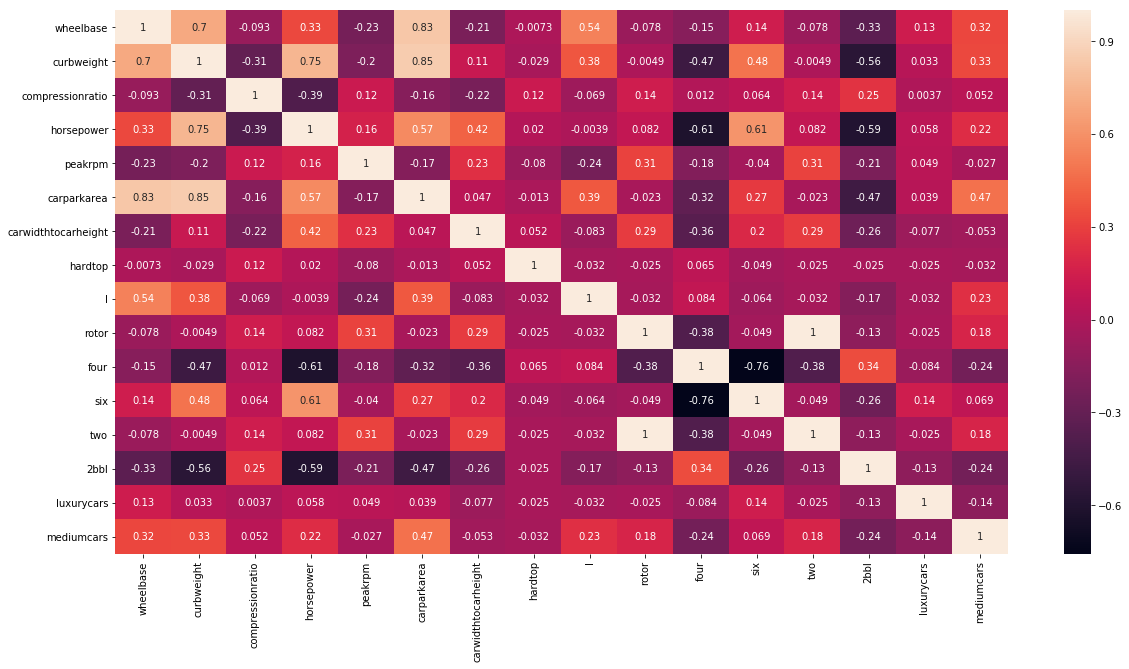

In [99]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_new.corr(),annot=True)

From the correlation matrix, it can be found that the `rotor` feature is not so correlated with any other features.
The next highest VIF value is for the `two` variable. It is also significant and is not so correlated with any other features. The next highest VIF value is for the `carparkarea` variable. It is also significant and but is strongly correlated with `wheelbase`, `curbweight` features, so we can remove it.

In [100]:
# Drop the feature carparkarea

X_train_new = X_train_new.drop(["carparkarea"], axis = 1)

#### Model 6

Rebuilding the model without `carparkarea`

In [101]:
# Build the linear model

mlrm_6 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     66.17
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.43e-46
Time:                        19:28:43   Log-Likelihood:                 133.07
No. Observations:                 124   AIC:                            -236.1
Df Residuals:                     109   BIC:                            -193.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0024    

In [102]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
8,rotor,inf
11,two,inf
1,curbweight,28.81
3,horsepower,24.56
0,wheelbase,21.14
2,compressionratio,19.62
9,four,18.29
4,peakrpm,10.84
5,carwidthtocarheight,9.79
10,six,5.51


It can be seen that R-squared and Adjusted R-squared values decreased to 89.5% and 88.1% respectively.

`l` has high p-value(0.186 greater than 0.05) and VIF value(1.8 < 5). So we can drop it.

In [103]:
# Drop the feature l

X_train_new = X_train_new.drop(["l"], axis = 1)

#### Model 7

Rebuilding the model without `l`

In [104]:
# Build the linear model

mlrm_7 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     70.62
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.96e-47
Time:                        19:28:44   Log-Likelihood:                 132.07
No. Observations:                 124   AIC:                            -236.1
Df Residuals:                     110   BIC:                            -196.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0361    

In [105]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
7,rotor,inf
10,two,inf
1,curbweight,27.48
3,horsepower,21.10
0,wheelbase,19.47
2,compressionratio,18.70
8,four,18.24
4,peakrpm,10.83
5,carwidthtocarheight,9.63
9,six,5.46


It can be seen that R-squared and Adjusted R-squared values decreased to 89.3% and 88% respectively.

`wheelbase` has high p-value(0.173 greater than 0.05) and VIF value(19.47 greater than 5). So we can drop it.

In [106]:
# Drop the feature wheelbase

X_train_new = X_train_new.drop(["wheelbase"], axis = 1)

#### Model 8

Rebuilding the model without `wheelbase`

In [107]:
# Build the linear model

mlrm_8 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     75.75
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.12e-47
Time:                        19:28:44   Log-Likelihood:                 131.02
No. Observations:                 124   AIC:                            -236.0
Df Residuals:                     111   BIC:                            -199.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0567    

In [108]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
6,rotor,inf
9,two,inf
2,horsepower,20.85
7,four,18.12
1,compressionratio,17.92
0,curbweight,13.91
3,peakrpm,10.75
4,carwidthtocarheight,9.50
8,six,5.33
10,2bbl,2.71


It can be seen that R-squared and Adjusted R-squared values decreased to 89.1% and 87.9% respectively.

`carwidthtocarheight` has p-value(0.041) almost equal to 0.05 and high VIF, so we can drop it.

In [109]:
# Drop the feature carwidthtocarheight

X_train_new = X_train_new.drop(["carwidthtocarheight"], axis = 1)

#### Model 9

Rebuilding the model without `carwidthtocarheight`

In [110]:
# Build the linear model

mlrm_9 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     79.92
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.65e-48
Time:                        19:28:45   Log-Likelihood:                 128.68
No. Observations:                 124   AIC:                            -233.4
Df Residuals:                     112   BIC:                            -199.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1386      0.074  

In [111]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
5,rotor,inf
8,two,inf
2,horsepower,18.07
1,compressionratio,17.81
6,four,16.87
0,curbweight,13.74
3,peakrpm,10.58
7,six,5.30
9,2bbl,2.69
11,mediumcars,2.32


It can be seen that R-squared and Adjusted R-squared values decreased 88.7% and 87.6% respectively. 

`rotor` has p-value  of 0.03 (almost 0.05) but VIF value(greater than 5). So we can drop it.

In [112]:
# Drop the feature rotor

X_train_new = X_train_new.drop(["rotor"], axis = 1)

#### Model 10

Rebuilding the model without `rotor`

In [113]:
# Build the linear model

mlrm_10 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     79.92
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.65e-48
Time:                        19:28:45   Log-Likelihood:                 128.68
No. Observations:                 124   AIC:                            -233.4
Df Residuals:                     112   BIC:                            -199.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1386      0.074  

In [114]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
2,horsepower,18.07
1,compressionratio,17.81
5,four,16.87
0,curbweight,13.74
3,peakrpm,10.58
6,six,5.30
8,2bbl,2.69
10,mediumcars,2.32
7,two,1.75
4,hardtop,1.15


It can be seen that R-squared and Adjusted R-squared values same as 88.7% and 87.6% respectively.

`two` has p-value of 0.03 (almost 0.05) but VIF value(lesser than 5). So we can drop it.

In [115]:
# Drop the feature two

X_train_new = X_train_new.drop(["two"], axis = 1)

#### Model 11

Rebuilding the model without `two`

In [116]:
# Build the linear model

mlrm_11 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     84.47
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.12e-47
Time:                        19:28:46   Log-Likelihood:                 126.00
No. Observations:                 124   AIC:                            -230.0
Df Residuals:                     113   BIC:                            -199.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0870      0.071  

In [117]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
2,horsepower,17.55
1,compressionratio,15.42
0,curbweight,13.72
5,four,11.27
3,peakrpm,10.35
6,six,4.17
7,2bbl,2.67
9,mediumcars,2.32
4,hardtop,1.15
8,luxurycars,1.10


It can be seen that R-squared and Adjusted R-squared values decreased to 88.2% and 87.2% respectively. 

We generally want VIF value to be less than 5. Here `horsepower` has high VIF, but it is a significant feature. Therefore, we need to check the correlation matrix to find if `horsepower` feature is correlated with any other features.

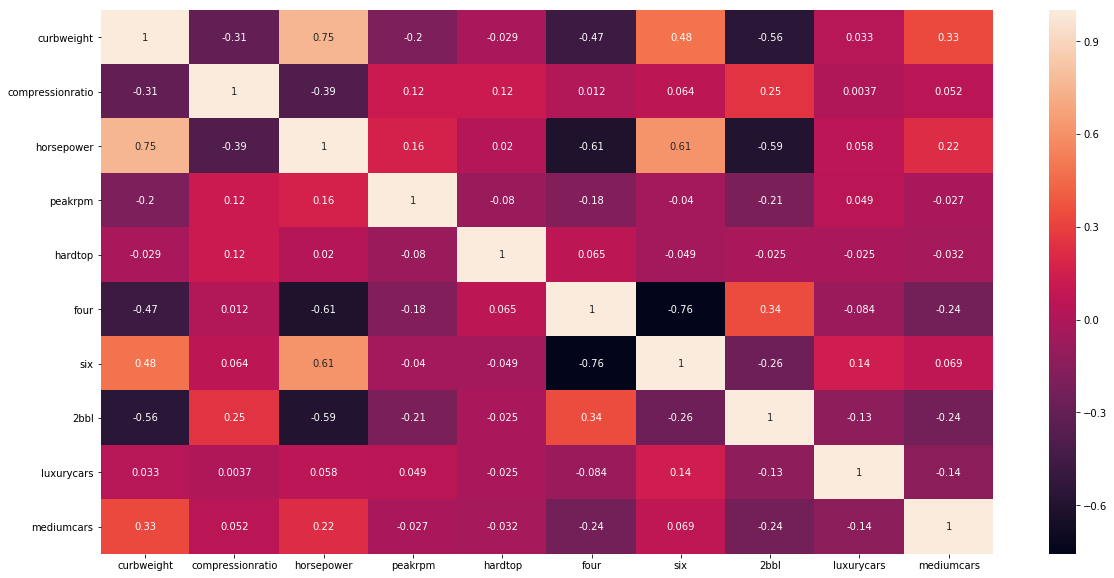

In [118]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_new.corr(),annot=True)

From the correlation matrix, it can be found that the `horsepower` feature is significant and but is strongly correlated with `wheelbase`, `six` features, so we can remove it.

In [119]:
# Drop the feature horsepower

X_train_new = X_train_new.drop(["horsepower"], axis = 1)

#### Model 12

Rebuilding the model without `horsepower`

In [120]:
# Build the linear model

mlrm_12 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     65.33
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.52e-41
Time:                        19:28:47   Log-Likelihood:                 106.20
No. Observations:                 124   AIC:                            -192.4
Df Residuals:                     114   BIC:                            -164.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1682      0.082  

In [121]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
1,compressionratio,11.25
4,four,10.94
0,curbweight,6.34
2,peakrpm,5.45
5,six,2.90
6,2bbl,2.66
8,mediumcars,2.29
7,luxurycars,1.09
3,hardtop,1.07


It can be seen that R-squared and Adjusted R-squared values decreased to 83.8% and 82.5% respectively.

`peakrpm` has high p-value(0.899 greater than 0.05), so we need to remove it.

In [122]:
# Drop the feature peakrpm

X_train_new = X_train_new.drop(["peakrpm"], axis = 1)

#### Model 13

Rebuilding the model without `peakrpm`

In [123]:
# Build the linear model

mlrm_13 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     74.13
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.50e-42
Time:                        19:28:48   Log-Likelihood:                 106.19
No. Observations:                 124   AIC:                            -194.4
Df Residuals:                     115   BIC:                            -169.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1615      0.062  

In [124]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
3,four,10.63
1,compressionratio,8.68
0,curbweight,6.26
4,six,2.90
5,2bbl,2.57
7,mediumcars,2.29
6,luxurycars,1.09
2,hardtop,1.05


It can be seen that R-squared and Adjusted R-squared values are 83.8% and 82.6% respectively.

`compressionratio` has high p-value(0.392 greater than 0.05), so we need to remove it.

In [125]:
# Drop the feature compressionratio

X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

#### Model 14

Rebuilding the model without `compressionratio`

In [126]:
# Build the linear model

mlrm_14 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     84.81
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.28e-42
Time:                        19:28:48   Log-Likelihood:                 105.79
No. Observations:                 124   AIC:                            -195.6
Df Residuals:                     116   BIC:                            -173.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1906      0.052      3.651      0.0

In [127]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
2,four,6.37
0,curbweight,6.25
4,2bbl,2.39
3,six,2.26
6,mediumcars,2.03
5,luxurycars,1.08
1,hardtop,1.03


It can be seen that R-squared and Adjusted R-squared values are 83.7% and 82.7%(increased by 0.1%) respectively.

`hardtop` has high p-value(0.216 greater than 0.05), so we need to remove it.

In [128]:
# Drop the feature hardtop

X_train_new = X_train_new.drop(["hardtop"], axis = 1)

#### Model 15

Rebuilding the model without `hardtop`

In [129]:
# Build the linear model

mlrm_15 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     98.23
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.64e-43
Time:                        19:28:48   Log-Likelihood:                 104.97
No. Observations:                 124   AIC:                            -195.9
Df Residuals:                     117   BIC:                            -176.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1891      0.052      3.614      0.0

In [130]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
1,four,6.30
0,curbweight,6.25
3,2bbl,2.38
2,six,2.26
5,mediumcars,2.03
4,luxurycars,1.08


It can be seen that R-squared and Adjusted R-squared values are 83.4% and 82.6%(decreased by 0.1%) respectively.

`six` has high p-value(0.043) almost equal to 0.05, where VIF value is less than 5 so we need to remove it.

In [131]:
# Drop the feature six

X_train_new = X_train_new.drop(["six"], axis = 1)

#### Model 16

Rebuilding the model without `six`

In [132]:
# Build the linear model

mlrm_16 =  mlr_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.80e-43
Time:                        19:28:49   Log-Likelihood:                 102.80
No. Observations:                 124   AIC:                            -193.6
Df Residuals:                     118   BIC:                            -176.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1378      0.047      2.963      0.0

In [133]:
# Calculate the VIF values

calculate_vif(X_train_new)

,Features,VIF
1,four,3.91
0,curbweight,3.18
2,2bbl,2.13
4,mediumcars,2.01
3,luxurycars,1.05


It can be seen that R-squared and Adjusted R-squared values are 82.8% and 82.1% respectively.

Even though we generally want VIF value to be less than 5, there can be situations where we can reduce the cut-off. Here `four` has VIF of 4 almost equal to 5, but it is a significant feature. Therefore, we need to check the correlation matrix to find if `four` feature is correlated with any other features.

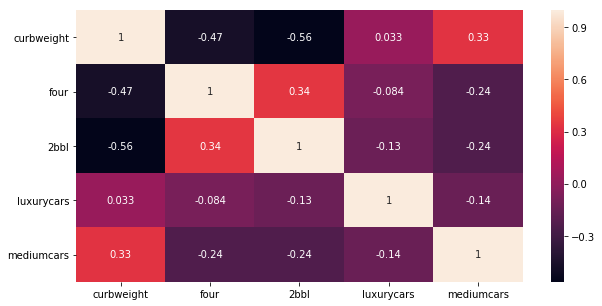

In [134]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train_new.corr(),annot=True)

From the correlation matrix, it can be found that the `four` feature is significant and but is less correlated with `2bbl`. Therefore, we will keep this feature in modelling.

 It can be concluded that **`Model 16`** is the best model for predicting the price of cars. It has fairly high `R-squared` and `Adjusted R-squared value`, **`82.8%`** and **`82.1%`** respectively. The features are `curbweight`, `four`, `2bbl`, `luxurycars`, `mediumcars`.

### Residual Analysis of the train data

Now, we can check if the error terms are also normally distributed (one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [135]:
# Add a constant variable 
X_train_lm = sm.add_constant(X_train_new)
    
# Run the linear model   
mlrm = sm.OLS(y_train,X_train_lm).fit() 


In [136]:
# Predict the price of train dataset

y_train_pred = mlrm.predict(X_train_lm)

#### Distribution of the error terms

Text(0.5, 0, 'Errors')

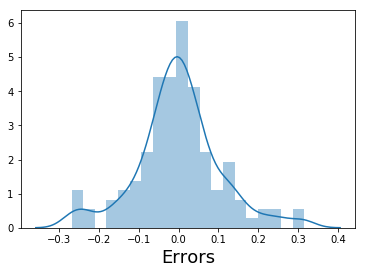

In [137]:
# Plot the histogram of the error terms

sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The residuals are following the normally distribution with a mean of almost 0.

#### Looking for patterns in the residuals

Text(0, 0.5, 'ytest-ypred')

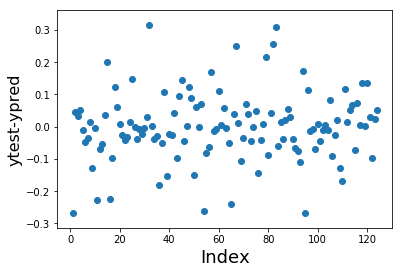

In [138]:
# Plot the scatterplot of the error terms to find any pattern

c = [i for i in range(1,125,1)]
plt.scatter(c,y_train - y_train_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)  

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

## Predictions

We have fitted the model and checked the assumptions of error terms, we can now make predictions using the final, i.e. Model 16.

#### Applying the scaling on the test sets

In [139]:
num_vars = [key for key, value in unique_values.items() if value > 2]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [140]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,luxurycars,mediumcars
count,54.00000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.00000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.87037,0.777778,0.444444,1.0,0.451288,0.454040,0.496865,0.429763,0.570539,0.623944,...,0.018519,0.222222,0.018519,0.12963,0.0,0.462963,0.055556,0.018519,0.018519,0.500000
std,0.33905,0.419643,0.501570,0.0,0.210781,0.215676,0.281812,0.219538,0.255682,0.192491,...,0.136083,0.419643,0.136083,0.33905,0.0,0.503308,0.231212,0.136083,0.136083,0.504695
min,0.00000,0.000000,0.000000,1.0,0.072464,0.000000,0.078332,0.000000,-0.127273,-0.070175,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,0.000000,1.0,0.286232,0.302273,0.291377,0.243243,0.427273,0.561404,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,0.000000,1.0,0.385870,0.472727,0.439356,0.360360,0.536364,0.643275,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.00000,1.000000,1.000000,1.0,0.572464,0.627273,0.714150,0.594595,0.825000,0.735380,...,0.000000,0.000000,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.0,1.000000,0.900000,1.119394,1.000000,1.000000,0.976608,...,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [141]:
y_test = df_test.pop('price')
X_test = df_test

In [142]:
# Selecting the features from trained model

X_train_lm= X_train_lm.drop(['const'], axis=1)
X_test = X_test[X_train_lm.columns]

# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)

In [143]:
# Predict the price of cars on test dataset

y_pred = mlrm.predict(X_test)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

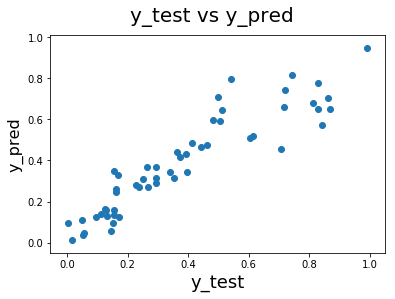

In [144]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

The values are almost linearly spread.

Text(0, 0.5, 'Car Price')

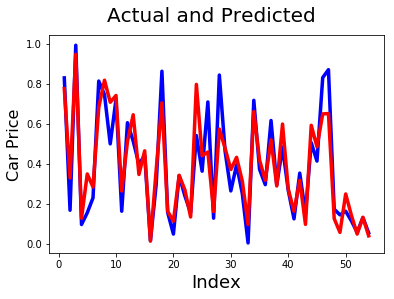

In [145]:
# Actual vs Predicted
c = [i for i in range(1,55,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16) 

The actual and predicted values follows almost same pattern.

Text(0, 0.5, 'y_test - y_pred')

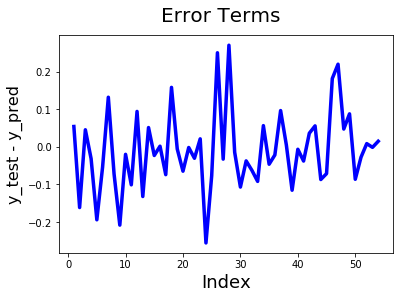

In [149]:
# Plot the error terms
c = [i for i in range(1,55,1)]
fig = plt.figure()
plt.plot(c,y_test - y_pred, color="blue", linewidth=3.5, linestyle="-")     #Plotting error terms
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('y_test - y_pred', fontsize=16)


The equation of our best fitted line is:

$ price = 0.1378 + 0.6062  \times  curbweight - 0.0901  \times  four - 0.0975 \times 2bbl + 0.4266 \times luxurycars + 0.0904 \times mediumcars $


In [146]:
print(mlrm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.80e-43
Time:                        19:28:52   Log-Likelihood:                 102.80
No. Observations:                 124   AIC:                            -193.6
Df Residuals:                     118   BIC:                            -176.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1378      0.047      2.963      0.0

##### Looking at the RMSE

In [147]:
from sklearn.metrics import mean_squared_error

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1048659888195179

###### Checking the R-squared on the test set

In [148]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8444272922514507

### Conclusion


The equation of our best fitted line is:

$ price = 0.1378 + 0.6062  \times  curbweight - 0.0901  \times  four - 0.0975 \times 2bbl + 0.4266 \times luxurycars + 0.0904 \times mediumcars $


A Multiple Linear Regression model is built with R-squared value of 82.8% and Adjusted R-squared value of 82.1% for predicting the car prices. Also, the F-statistic seems to be good. The independent predictor variables for the model are: `curbweight`, `four`, `2bbl`, `luxurycars` and `mediumcars`. From the equation of best fitted line, it can be said that, the price increases for every unit change in `curbweight`, when all other variables are held constant. This is true for all five predictor variables. Cars with `four` cylinders are the most preferred ones in US market and is attributed with economy cars, the coefficient is negative. Also, cars with `2bbl` fuel system are the most preferred ones in US market and is attributed with economy cars, the coefficient is negative. Luxury and Medium Cars adds the price of the cars. Medium Cars like Nissan, Mazda, Volvo are preffered by the people in US.